# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb, neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

Code that is commented out with two hashtags should be uncommented when in use.

# All imports

The basic libraries, you may import more if there are present on the server's environment. If you dont have these packages installed on your local machine, you can use **pip install X** or **pip3 install X** to start using them.

In [2]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import Neutrino_functions

from math import *
import scipy as sci
from scipy.optimize import fmin

# MACHINE LEARNING IMPORTS
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

C:\Users\jaspe\AppData\Local\Temp\ipykernel_10728\1123556114.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Opening the MC and data frames

In [3]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# removing 'Subevent' from data
MC_EXT = MC_EXT.drop('Subevent', axis = 1)


# Display the top 10 rows of the DataFrame before changes
print("Before dropping the 'Subevent' column:")
display(data.head(10))

# Drop the 'Subevent' column
data = data.drop('Subevent', axis = 1)

# Display the top 10 rows of the DataFrame after changes
print("After dropping the 'Subevent' column:")
display(data.head(10))


Before dropping the 'Subevent' column:


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,Subevent,trk_range_muon_mom_v,trk_mcs_muon_mom_v
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0,0.624387,0.672995
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,1,0.145945,0.159
2,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0,0.502137,0.551996
3,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0,0.700354,0.627999
4,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,0,1.220361,1.124005
5,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0,0.517367,0.527997
6,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,1,0.114687,0.102
7,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0,0.106222,0.101
8,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0,0.490352,0.428998
9,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0,0.220104,0.228


After dropping the 'Subevent' column:


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0.624387,0.672995
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,0.145945,0.159
2,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0.502137,0.551996
3,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0.700354,0.627999
4,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,1.220361,1.124005
5,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0.517367,0.527997
6,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,0.114687,0.102
7,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0.106222,0.101
8,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0.490352,0.428998
9,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0.220104,0.228


# You can display the dataframe by uncommenting these lines and running the cell

In [4]:
# Uncomment these lines to display the dataframes
pd.set_option('display.max_columns', 100)
# displays top 10 results.
data.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0.624387,0.672995
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,0.145945,0.159
2,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0.502137,0.551996
3,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0.700354,0.627999
4,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,1.220361,1.124005
5,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0.517367,0.527997
6,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,0.114687,0.102
7,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0.106222,0.101
8,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0.490352,0.428998
9,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0.220104,0.228


In [5]:
MC_EXT.head(10)

# Get the column names of each DataFrame as sets
columns_MC_EXT = set(MC_EXT.columns)
columns_data = set(data.columns)

# Find the common columns
common_columns = columns_MC_EXT & columns_data
print("Common columns:")
print(common_columns)

# Find the columns present in MC_EXT but not in data
diff_columns_MC_EXT = columns_MC_EXT - columns_data
print("\nColumns in MC_EXT but not in data:")
print(diff_columns_MC_EXT)

# Find the columns present in data but not in MC_EXT
diff_columns_data = columns_data - columns_MC_EXT
print("\nColumns in data but not in MC_EXT:")
print(diff_columns_data)


Common columns:
{'category', 'reco_nu_vtx_sce_x', 'trk_len_v', 'trk_sce_end_z_v', 'trk_sce_end_x_v', 'trk_llr_pid_score_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_y', '_closestNuCosmicDist', 'trk_distance_v', 'trk_mcs_muon_mom_v', 'reco_nu_vtx_sce_z', 'trk_energy_tot', 'trk_sce_start_z_v', 'trk_score_v', 'trk_sce_start_y_v', 'trk_sce_end_y_v', 'trk_range_muon_mom_v', 'topological_score'}

Columns in MC_EXT but not in data:
{'true_muon_mom', 'weight', 'true_E', 'true_L'}

Columns in data but not in MC_EXT:
set()


# Machine learning for Particle Classification

First, look at a sub-sample of our Monte Carlo data.

In [6]:
# Reduce the amount of data for visualisation purposes
MC_EXT_VIS = MC_EXT.sample(int(len(MC_EXT)/10))

# Resetting the index
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Removing high energy (unphysical) monte carlo results
MC_EXT_VIS = MC_EXT_VIS[MC_EXT_VIS.trk_energy_tot <= 2]

# Resetting the index again
MC_EXT_VIS.reset_index(drop=True, inplace=True)

print("Displaying Dataframe:")
display(MC_EXT_VIS.head(10))

print("Displaying selections of the dataframe:")
display(MC_EXT_VIS[MC_EXT_VIS.category == 7])


Displaying Dataframe:


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,217.972425,104.900955,1.203953,21,0.907769,390.22702,71.245964,166.649368,0.997013,0.933894,331.476013,34.132236,244.851273,245.556198,34.073780,330.504272,0.648472,0.350845,0.353999,0.198300,0.639478,427.763367,0.360398
1,40.238978,129.105621,1.021416,21,0.979199,977.580811,82.821144,119.162399,0.999959,0.949145,950.824402,-37.275448,86.301628,86.579269,-36.333755,951.099792,1.168272,0.403757,0.372998,0.158957,1.831414,426.398163,0.389900
2,0.171789,166.62027,0.171789,21,0.597136,734.725464,117.428818,122.180565,1.0,0.945223,670.949707,-30.104565,165.295425,165.365295,-30.273352,670.901489,0.942583,0.485335,0.706995,0.192977,0.943603,457.339294,0.552438
3,165.367503,279.188507,0.639064,21,0.051227,405.020142,-109.482056,28.337269,1.0,0.981447,231.651413,37.791004,188.793274,188.612839,37.215378,231.964157,0.740357,0.732874,0.697998,0.184290,1.038075,461.986694,0.743143
4,135.438651,194.136475,0.304594,21,0.998714,488.50708,43.435299,170.442505,1.0,0.971051,335.301056,23.603983,54.68079,54.617153,23.429087,335.061829,1.065691,0.545331,0.540997,0.000315,1.175514,465.784271,0.552383
5,89.091135,177.78978,0.170514,21,0.997646,637.439575,-78.488281,40.19223,1.0,0.974698,471.311127,-23.964138,62.741016,62.795780,-24.022877,471.160828,0.694312,0.509656,0.466998,0.158957,0.846835,464.340271,0.513959
6,91.085194,76.949722,0.101235,21,0.468535,562.740479,89.651115,142.503143,0.981571,0.919868,615.658081,84.842278,197.885971,197.852020,84.779053,615.580566,0.663552,0.288661,0.285,0.212462,0.564622,458.378967,0.284658
7,265.585052,499.38623,1.187205,21,0.988031,655.697388,42.088398,204.25206,1.0,0.991976,161.343552,-7.429993,193.443039,193.370575,-7.145695,160.155624,1.359064,1.235036,1.156007,0.152324,1.417246,435.142731,1.264387
8,76.079243,18.128136,20.507641,21,0.967709,302.150757,51.153313,118.8013,0.080183,0.485732,284.889648,48.283199,115.662903,112.718964,50.892738,264.802643,1.100160,0.140519,0.106,0.158957,1.148264,440.174042,0.489712
9,170.298783,63.190948,0.252523,7,0.261469,219.809189,-80.808754,105.587624,0.975497,0.919775,168.454102,-49.078175,122.011398,122.114075,-49.077305,168.223541,0.277822,0.257216,0.232,0.257732,1.000000,0.000000,0.000000


Displaying selections of the dataframe:


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
9,170.298783,63.190948,0.252523,7,0.261469,219.809189,-80.808754,105.587624,0.975497,0.919775,168.454102,-49.078175,122.011398,122.114075,-49.077305,168.223541,0.277822,0.257216,0.232,0.257732,1.0,0.0,0.0
26,131.111761,46.952,0.478591,7,0.721364,111.297722,-64.836029,114.04142,0.879764,0.660271,102.060669,-99.916672,143.140274,143.541534,-100.208084,102.188843,0.499405,0.218712,0.173,0.257732,1.0,0.0,0.0
39,52.040186,143.142441,2.144651,7,0.014735,703.749878,-71.28714,170.313049,0.999408,0.923753,679.310547,59.474873,178.912964,176.947952,59.640533,680.186340,1.031032,0.434294,0.338999,0.257732,1.0,0.0,0.0
53,0.084990,174.967285,0.340661,7,0.002187,516.331299,56.36845,187.409241,1.0,0.973255,485.056305,-107.182846,134.438293,134.542755,-106.883987,485.137543,0.514338,0.503506,0.620995,0.257732,1.0,0.0,0.0
67,0.339206,78.590385,0.339206,7,0.116502,228.533218,99.511665,159.115982,0.939476,0.919834,184.118835,37.020241,167.24501,167.241852,37.086552,183.781143,0.310647,0.292364,0.223,0.257732,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14228,35.821664,57.717491,0.103381,7,0.014338,859.545593,46.605885,120.335121,0.977025,0.923086,873.632935,101.505417,118.988106,118.999092,101.408241,873.619263,0.427672,0.244446,0.184,0.257732,1.0,0.0,0.0
14231,137.374753,38.449238,0.071013,7,0.013501,305.720703,-73.895119,128.579849,0.85457,0.88048,303.604279,-104.900635,106.121269,106.129143,-104.885170,303.535706,0.223721,0.19755,0.202,0.257732,1.0,0.0,0.0
14248,281.607663,79.152939,0.888716,7,0.024099,407.626099,29.216082,148.278351,0.987411,0.93765,347.702728,-13.300503,119.497818,119.449387,-12.617467,347.103699,1.217067,0.293632,0.276,0.257732,1.0,0.0,0.0
14261,44.562990,151.088837,0.233806,7,0.032396,375.939392,-99.867775,123.377213,0.99969,0.9506,363.005402,44.231358,165.596649,165.583542,44.137016,363.221924,0.463614,0.451567,0.415998,0.257732,1.0,0.0,0.0


# Exercise 5 Data Visualisation
Lets visualise some of the variables using *seaborn*

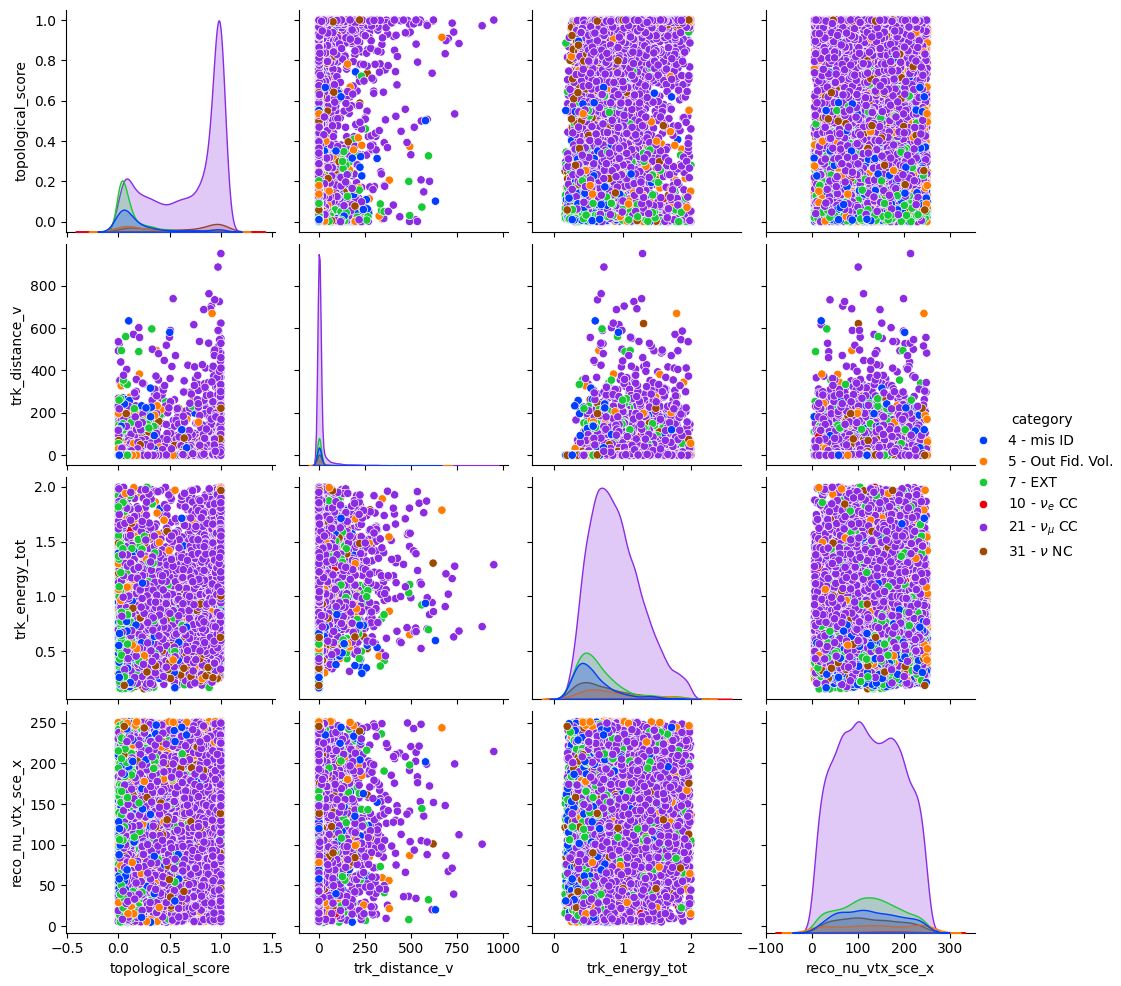

In [7]:
# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

Filtered Dataframe for no Muon Neutrino Events


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
9,170.298783,63.190948,0.252523,7,0.261469,219.809189,-80.808754,105.587624,0.975497,0.919775,168.454102,-49.078175,122.011398,122.114075,-49.077305,168.223541,0.277822,0.257216,0.232,0.257732,1.000000,0.000000,0.000000
16,30.523542,33.702305,0.224504,31,0.234345,447.209656,-67.926559,216.410767,0.869998,0.744621,436.68457,-54.229107,187.583786,187.428040,-54.314453,436.541626,0.320786,0.185218,0.201,0.158957,1.069936,440.638367,NaN
19,63.400295,33.341747,0.343888,31,0.142489,752.273193,-26.640547,199.5,0.955987,0.810423,735.987854,-7.340551,178.528732,178.263489,-7.442539,736.196960,0.212079,0.184262,0.156,0.158957,1.292689,424.978394,NaN
23,180.299736,41.484905,0.39449,4,0.428159,438.462036,30.027023,208.281815,0.89608,0.80426,425.961029,-8.071711,199.90596,199.651382,-8.249964,425.721436,0.360285,0.205222,0.156,0.187299,1.659880,437.302368,0.980435
26,131.111761,46.952,0.478591,7,0.721364,111.297722,-64.836029,114.04142,0.879764,0.660271,102.060669,-99.916672,143.140274,143.541534,-100.208084,102.188843,0.499405,0.218712,0.173,0.257732,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268,106.217231,23.271992,0.065578,31,0.057896,486.806854,74.796921,243.920624,0.854498,0.65078,474.800354,54.973541,245.513351,245.517197,54.913406,474.836151,0.188189,0.156173,0.217,0.158957,1.188104,431.200562,NaN
14270,56.467859,108.009987,0.304547,7,0.090161,405.110321,76.527725,93.995697,0.999272,0.944068,382.213348,-7.119055,157.891647,157.925201,-7.290674,381.956146,0.565069,0.357673,0.405998,0.257732,1.000000,0.000000,0.000000
14271,0.156200,119.872719,0.169819,4,0.011912,536.151428,-15.119086,159.607849,0.999857,0.944811,561.317627,94.852226,119.78421,119.799980,94.693726,561.367065,0.661832,0.383629,0.487997,0.158957,1.456595,437.692841,0.839053
14272,121.698204,55.492474,0.530692,4,0.009818,244.494263,72.672241,54.933117,0.981982,0.832377,205.25145,109.24411,57.99791,57.979710,108.912994,204.839340,0.261231,0.2392,0.172,0.158957,0.419099,461.210602,NaN


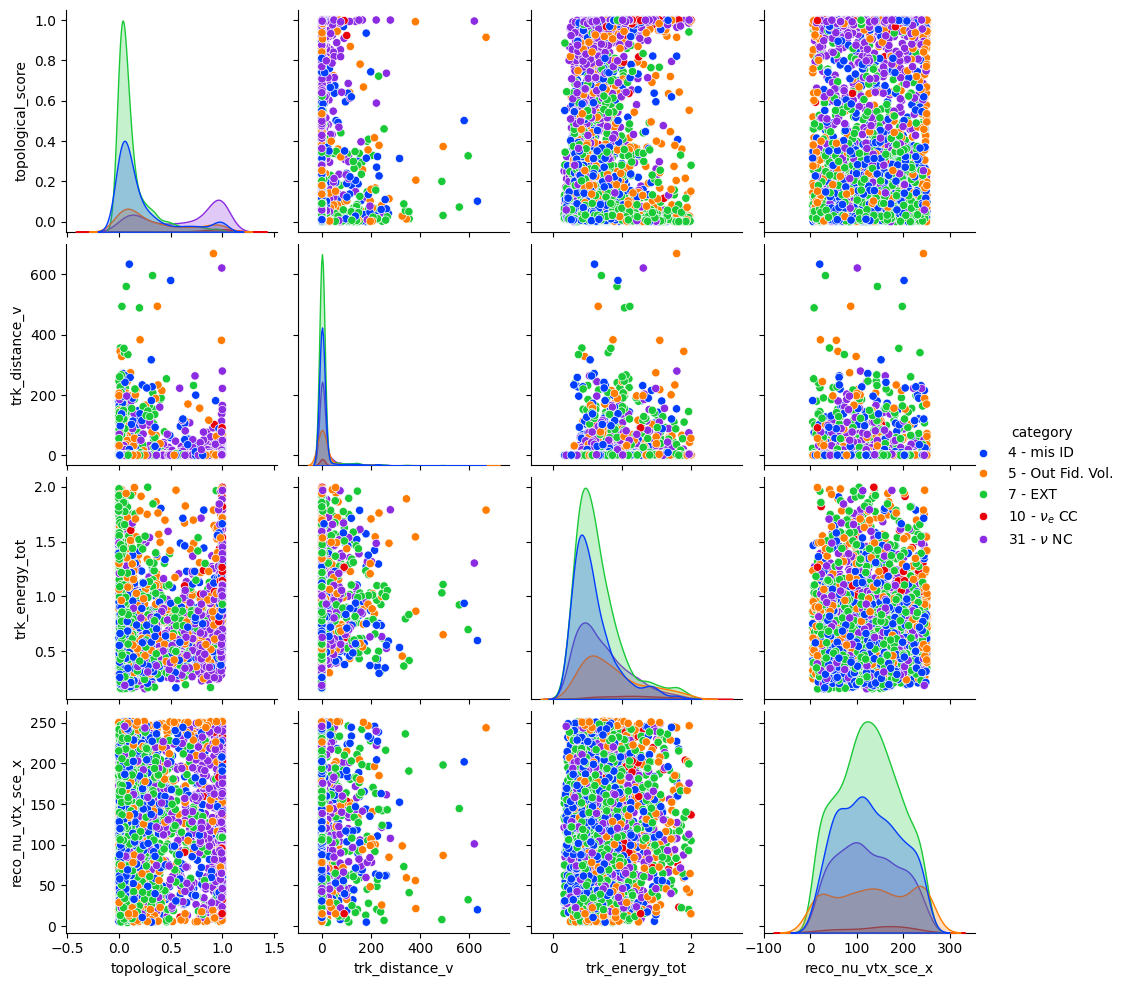

In [8]:
# Create a deep copy of MC_EXT_VIS without signal events
print("Filtered Dataframe for no Muon Neutrino Events")
display(MC_EXT_VIS[MC_EXT_VIS.category != 21])
MC_EXT_VIS_no21 = MC_EXT_VIS[MC_EXT_VIS.category != 21]

# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS_no21[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

In [9]:
# Plot your background events using sns.pairplot

# List of categories (excluding signal) in text
ptype_no_mu = [r"mid ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]


In [10]:
# Make sure to delete dataframe copies if you no longer need them!
##del MC_EXT_VIS

# Exercise 6: Random Forest applications

Here we shall modify the shape of our data for its usage in a decision tree, then apply the *RandomForest* method from the skikit-learn package.

In [11]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10))

# Remove muon neutrino and electron neutrino events.
MC_EXT_ML = MC_EXT_ML[~MC_EXT_ML.category.isin([21, 10])]

# Print length of dataframe,, with length N
print("Length of MC dataframe: ", len(MC_EXT_ML))

Length of MC dataframe:  31885


In [12]:
# # Setting up input parameters for random forest.
# X = MC_EXT_ML[features]
# y = np.array(MC_EXT_ML['category'])

# # Display shape of X and y, should be (N, 16) (N) where is number of samples.
# print("Shape of X:", X.shape)
# print("Shape of y:", y.shape)
# ##print()

# # Then split the data up into a "training set" and "test set" using train_test_split.
# # Keep the random_state=1 in your arguments
# y_train, y_test, x_train, x_test = train_test_split(y, X, test_size=0.2, train_size=0.8, random_state=1) # 80/20 training/test split

# # Print the shape, should now be
# print("\n(x_train) (y_train) shape:", x_train.shape, y_train.shape)
# ##print()


Produce your randomforest model and fit it (dont worry, there is no explicit output, but make sure you haven't made your model too big! It shouldn't take any more than a couple of minutes at most to fit).

In [13]:
# # Produce randomforest classifier model and fit to training data
# # Keep the random_state=1 in your arguments
# rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=8, random_state=1)

# # Fitting takes the input and "truth" data for classification purposes
# rf.fit(x_train, y_train)

Test the accuracies of your results:

In [14]:
# # Produce predictions for the classification of your training dataset using your model:
# y_pred_train = rf.predict(x_train)

# # plot the accuracies of said predictions
# print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred_train))
# rf_acc_train = metrics.accuracy_score(y_train, y_pred_train)


# y_pred_test = rf.predict(x_test)
# print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred_test))
# rf_acc_test = metrics.accuracy_score(y_test, y_pred_test)

If your training accuracy is similar to your testing accuracy, this demonstrates that you haven't overfit your data!

#### Confusion matrix and variable importance

Produce a confusion matrix for your model to quantify its ability to predict your different interaction types.

In [15]:
# # For labelling your confusion matrix
# ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

# # plot your confusion matrix
# cm = confusion_matrix(y_test, y_pred_test, normalize = 'true')
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
# disp.plot()
# plt.show()

Plot the importance of your different parameters.

In [16]:
# # Plot importance
# importance = rf.feature_importances_
# ytix = features

# plt.barh(range(16), importance)
# plt.yticks(range(16), features)
# plt.xlabel("Importance")
# plt.ylabel("Features")
# plt.show()


# Neutrino_functions.py

You are given access to a couple of template functions provided within Neutrino_functions.py, which may be helpful in completing this lab. One such function is 'Neutrino_functions.histogram_plot', which can be seen below, but you can create your own functions if you wish.

In [17]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_fig=True, plot_data=False, logscale=None, dataFrame=None, Stat_func=None)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



# Exercise 7: Selection Cuts and Histogram plotting

Modify selection cuts. Remember to cut the same variables in both data sets.

In [18]:
def Selections(frame: pd.DataFrame):

    # Basic variables present in dataframe
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']
    cosmic = frame['_closestNuCosmicDist']       # GeV




    # select the conditions you want to apply, here is an initial condition to get you started.
    # Define conditions
    condition1 = (trk_len_v > -1000) & (trk_len_v < 1000)
    condition2 = (trk_energy_tot <= 2)
    cond3 = (trk_start_x_v > -10) & (trk_start_x_v < 240)
    cond4 = (trk_end_x_v > -10) & (trk_end_x_v < 240)
    cond5 = (trk_start_y_v > -100) & (trk_start_y_v < 100)
    cond6 = (trk_end_y_v > -100) & (trk_end_y_v < 100)
    cond7 = (trk_start_z_v > -100) & (trk_start_z_v < 1000)
    cond8 = (trk_end_z_v > -100) & (trk_end_z_v < 1000)
    cond9 = (reco_x > 10)
    topcond = (topological > 0.3)
    cond10 = (cosmic > 1)

    # You can add more conditions here

    # Combine conditions
    selection = condition2 & topcond & condition1 & cond3 & cond4 & cond5 & cond6 & cond7 & cond8 & cond9 & cond10
    # If you have more conditions, you can add them like this:
    # selection = condition1 & condition2 & condition3 & ...
    # Apply selection on dataframe
    frame = frame[selection]

    return frame

## Calls the selection function on the dataframes

In [19]:
MC_EXT_CUT = Selections(MC_EXT)
data_frame = Selections(data)

# Plot all variables and decide on selection cuts
Here is the section with the example histogram plots for each variable. Create a new cell and implement your own function to plot all the histograms.

In [20]:
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT_CUT)).intersection(list(data_frame)))
print(all_variables_to_plot)
print(list(MC_EXT_CUT))

['category', 'reco_nu_vtx_sce_x', 'trk_len_v', 'trk_sce_end_z_v', 'trk_sce_end_x_v', 'trk_llr_pid_score_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_y', '_closestNuCosmicDist', 'trk_distance_v', 'trk_mcs_muon_mom_v', 'reco_nu_vtx_sce_z', 'trk_energy_tot', 'trk_sce_start_z_v', 'trk_score_v', 'trk_sce_start_y_v', 'trk_sce_end_y_v', 'trk_range_muon_mom_v', 'topological_score']
['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'category', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot', 'trk_range_muon_mom_v', 'trk_mcs_muon_mom_v', 'weight', 'true_E', 'true_L', 'true_muon_mom']


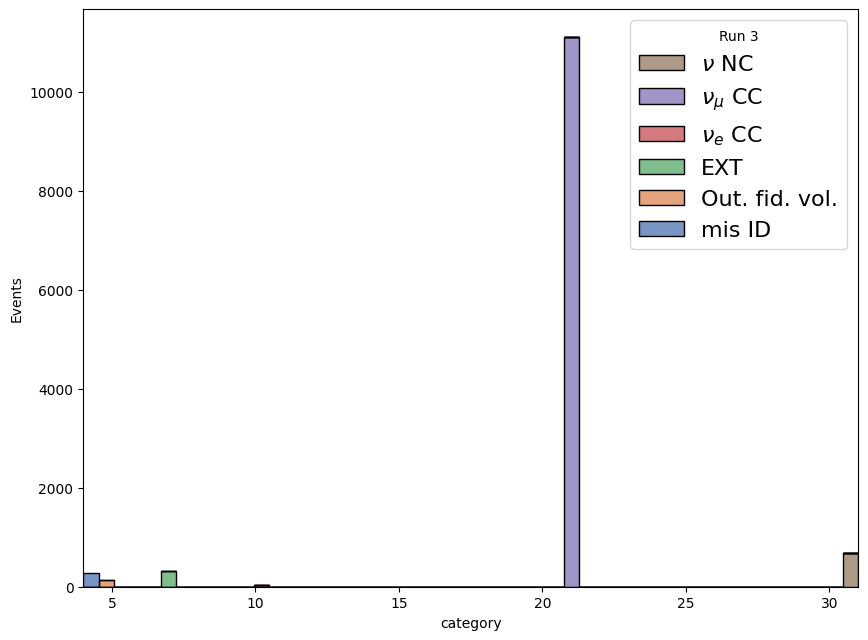

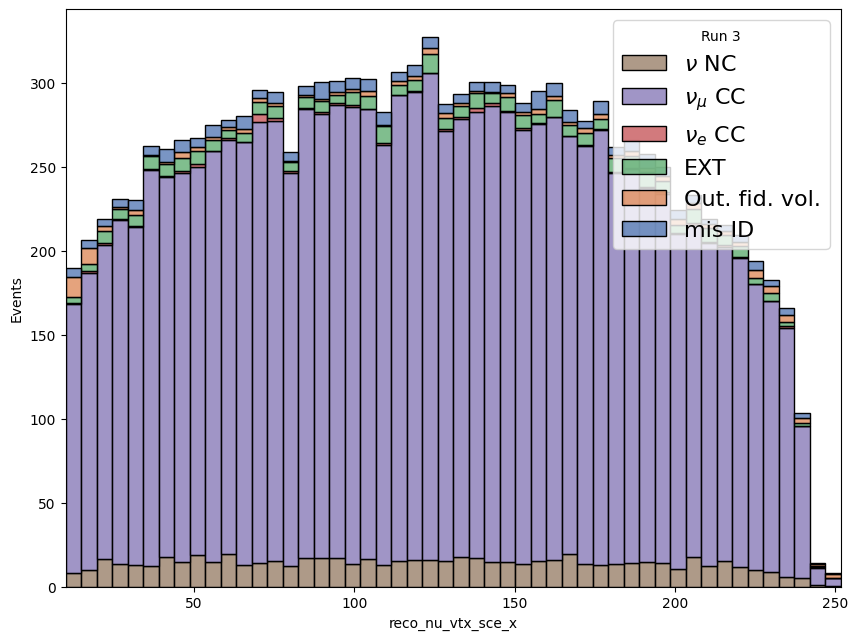

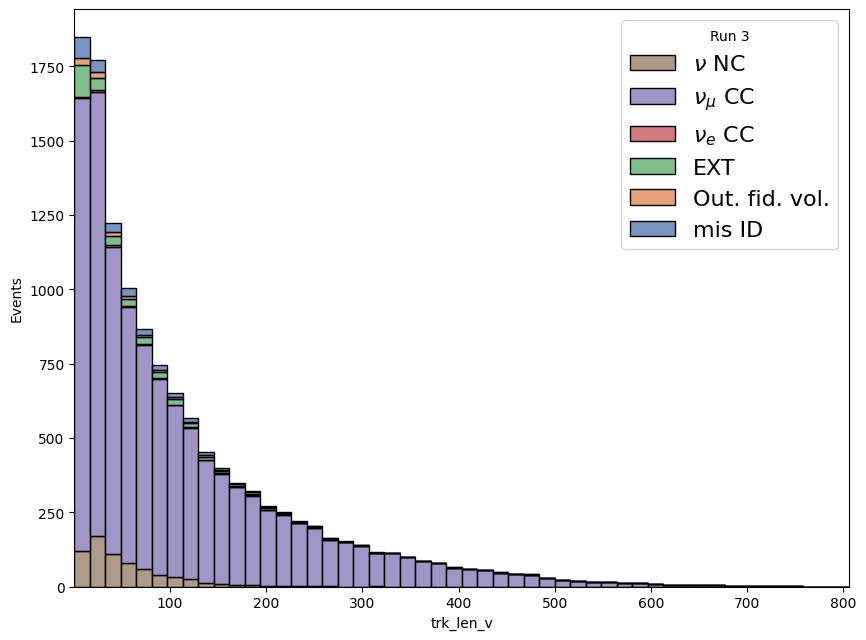

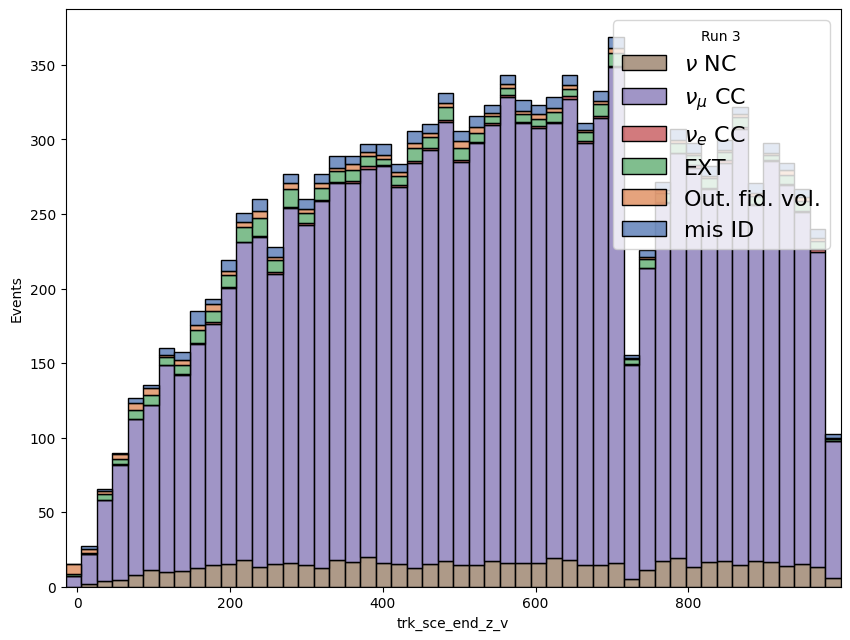

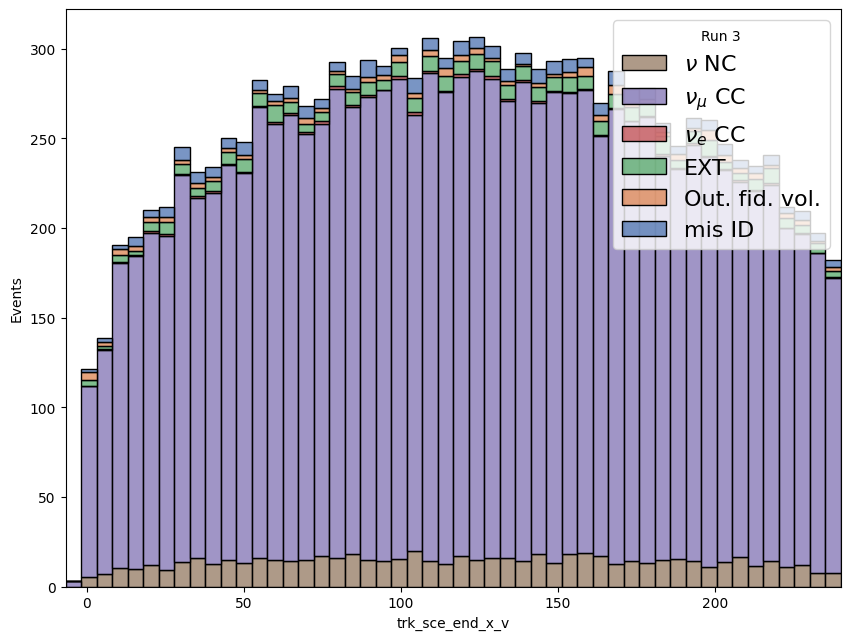

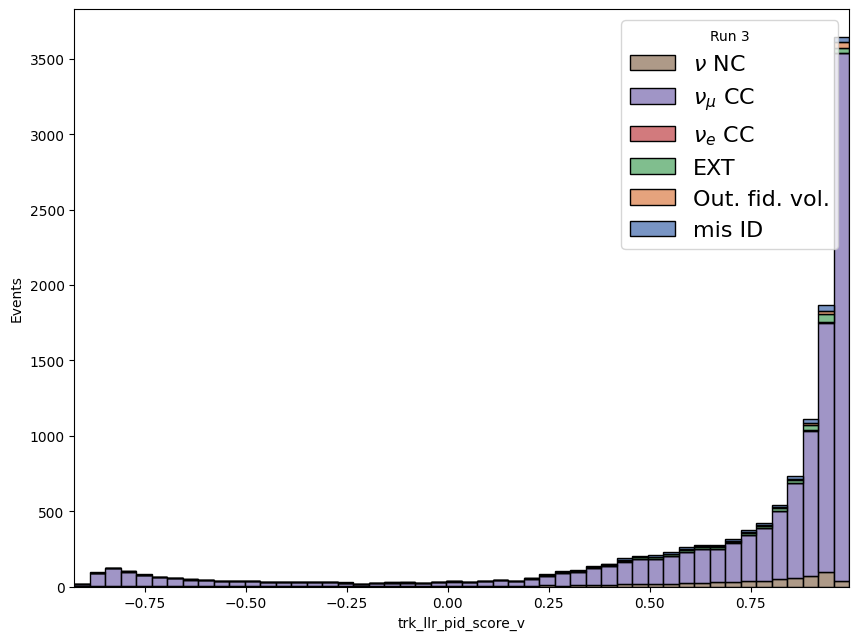

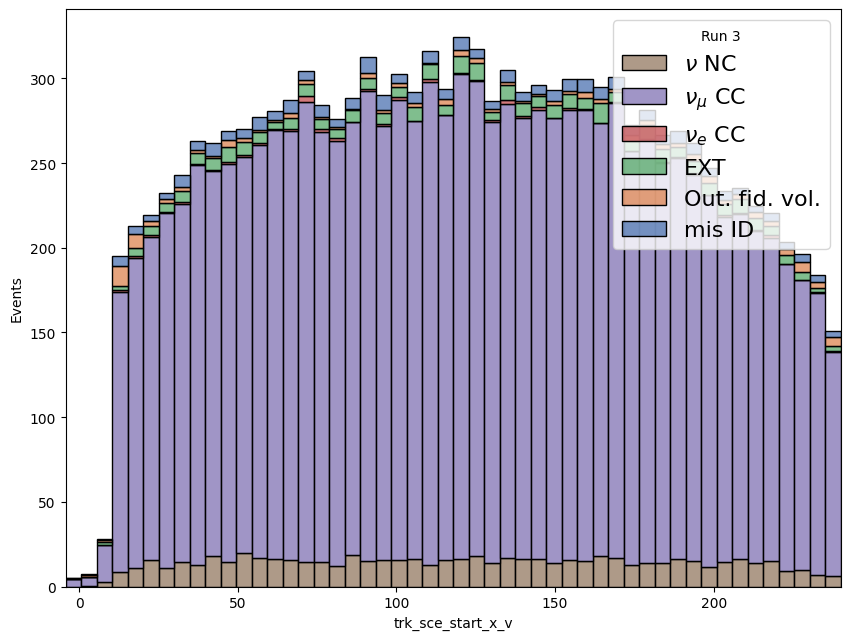

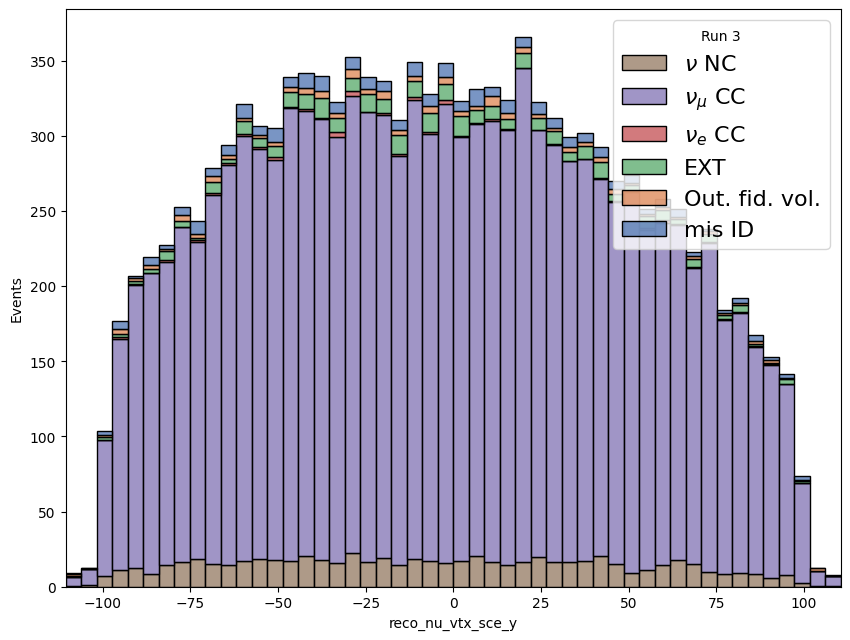

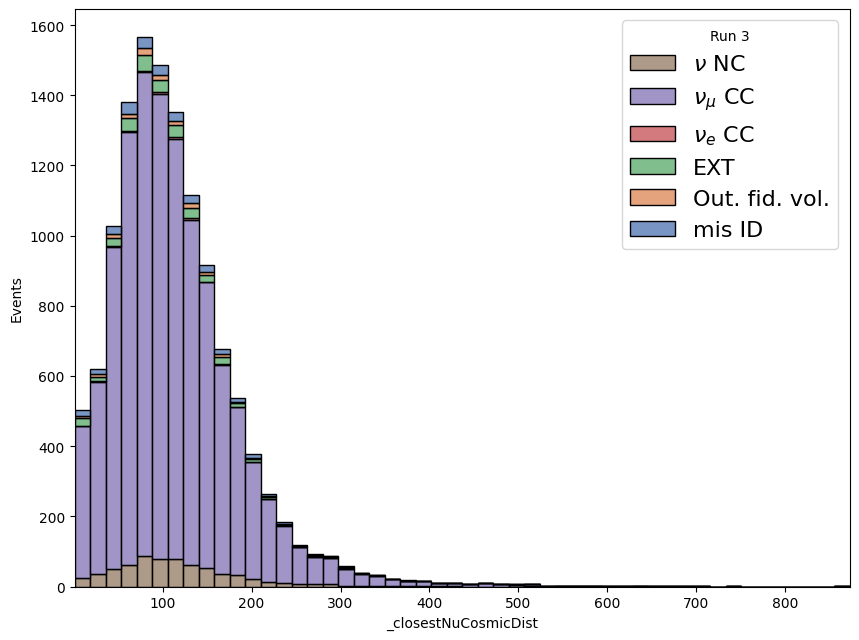

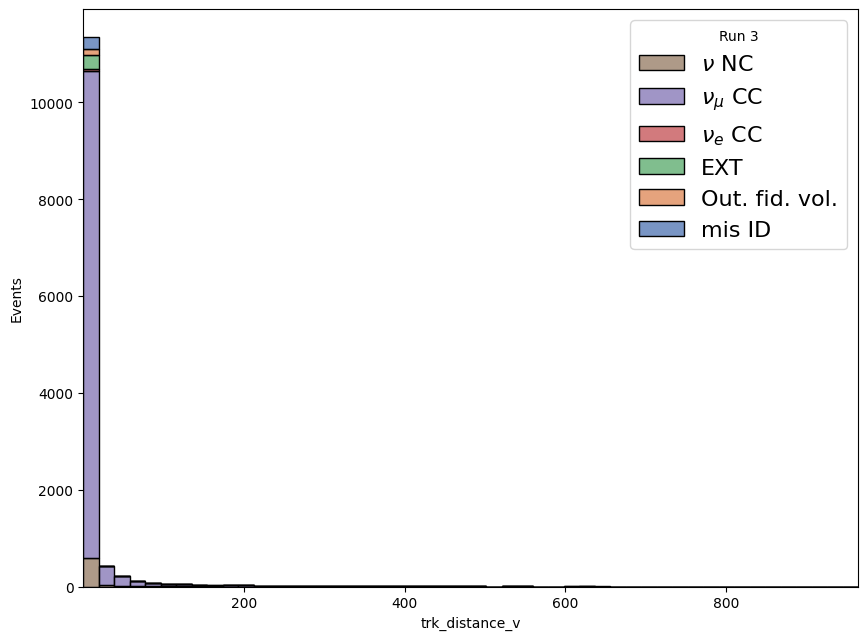

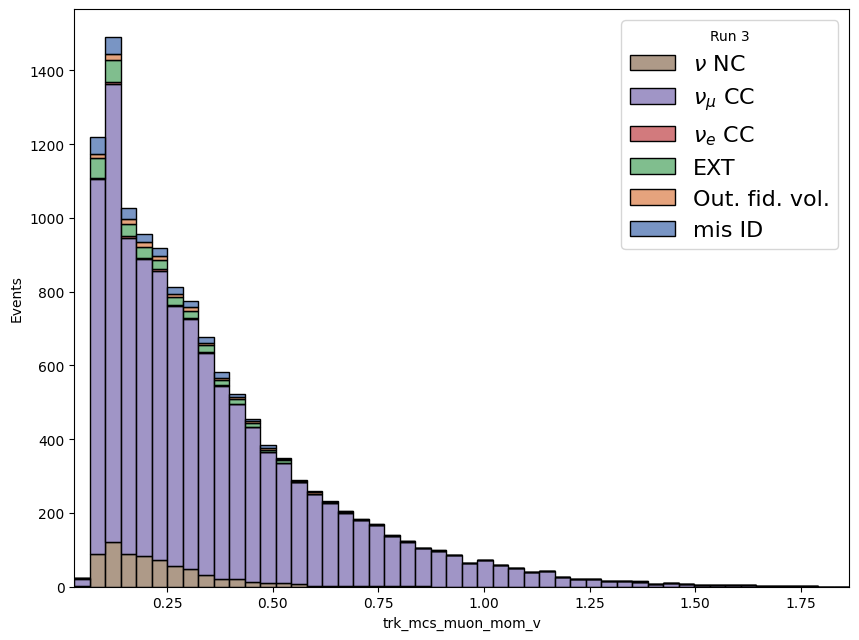

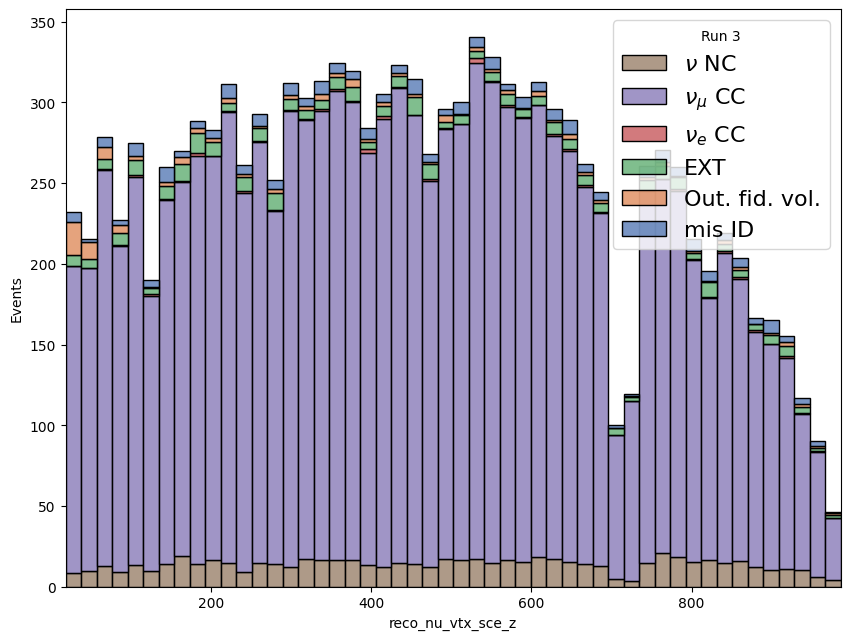

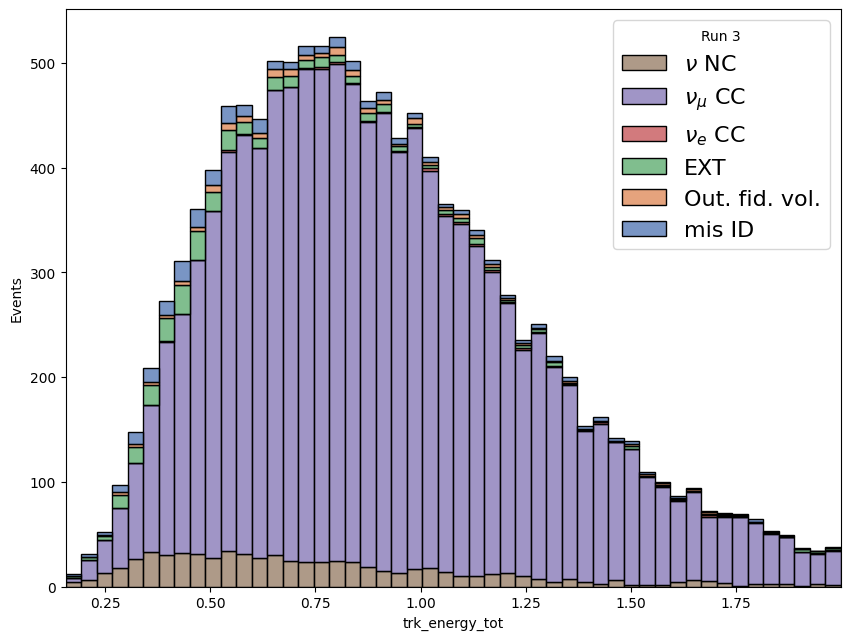

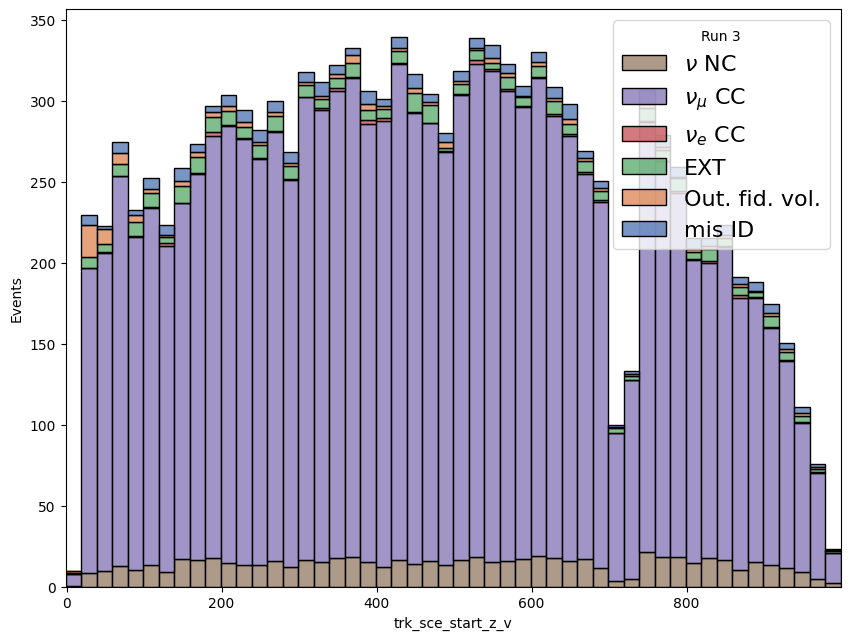

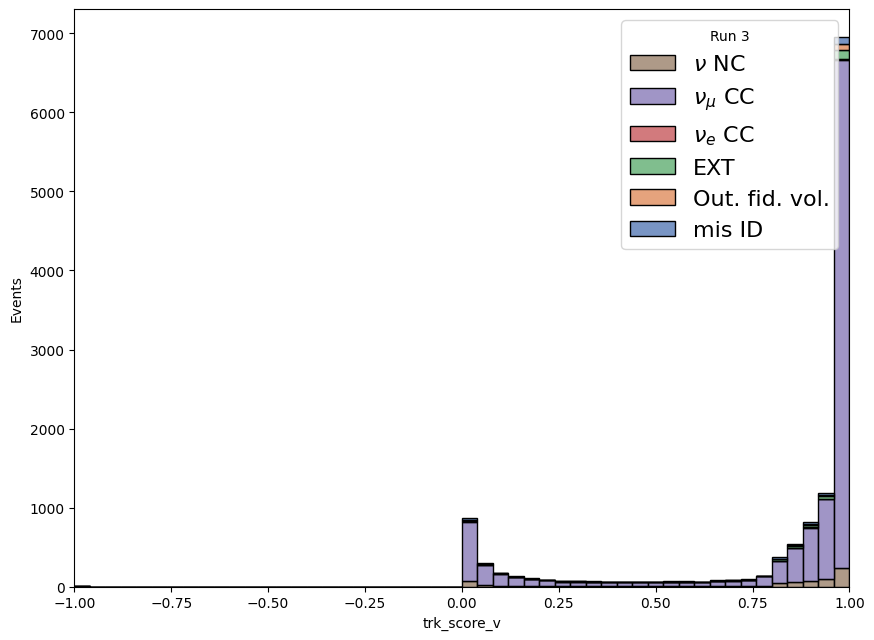

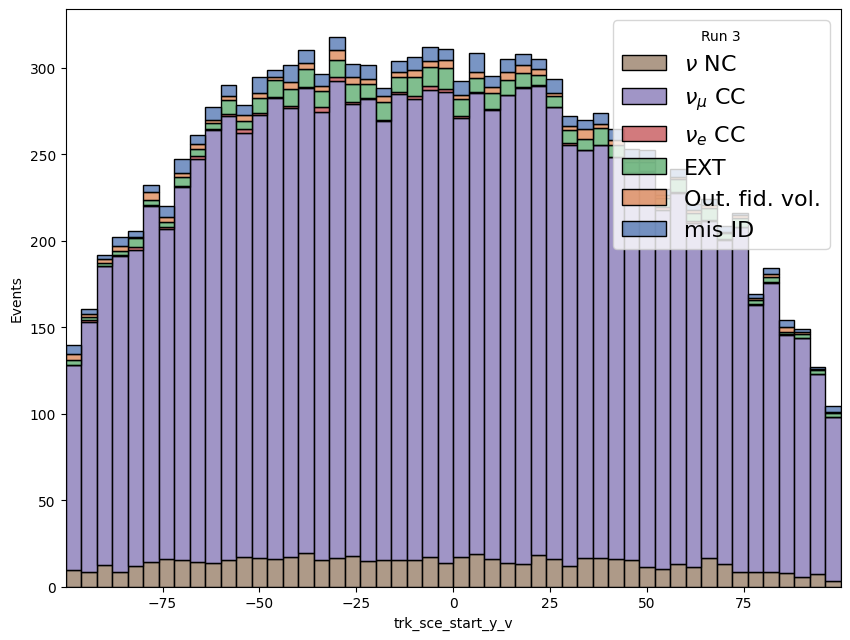

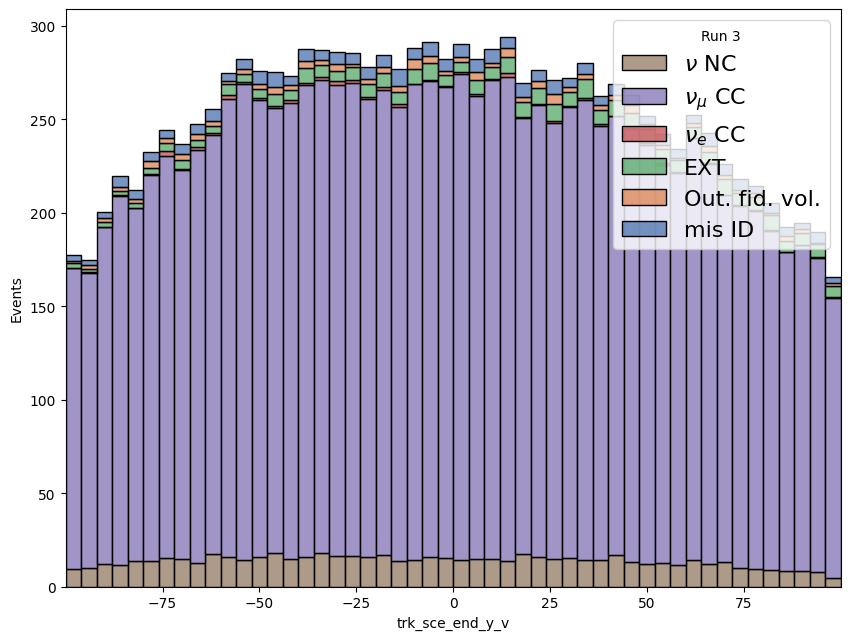

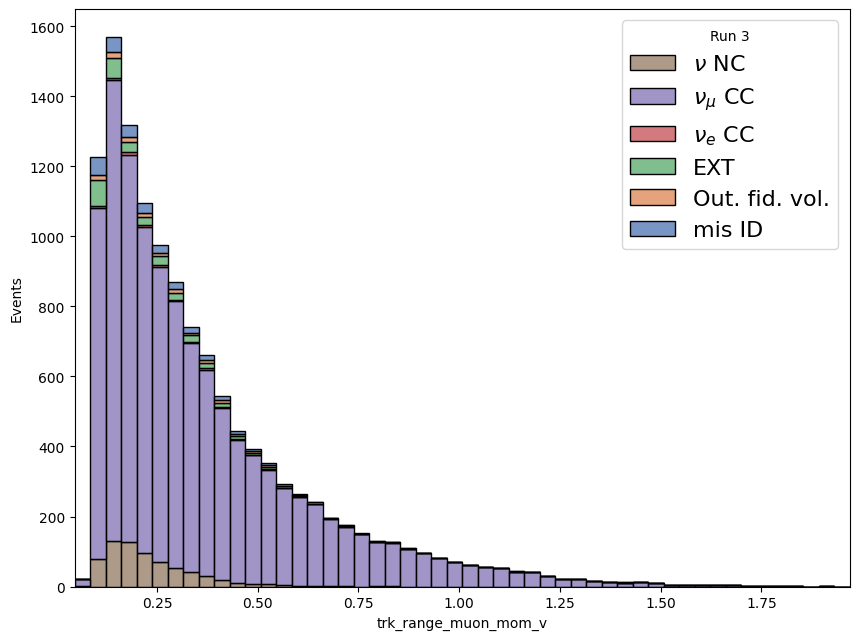

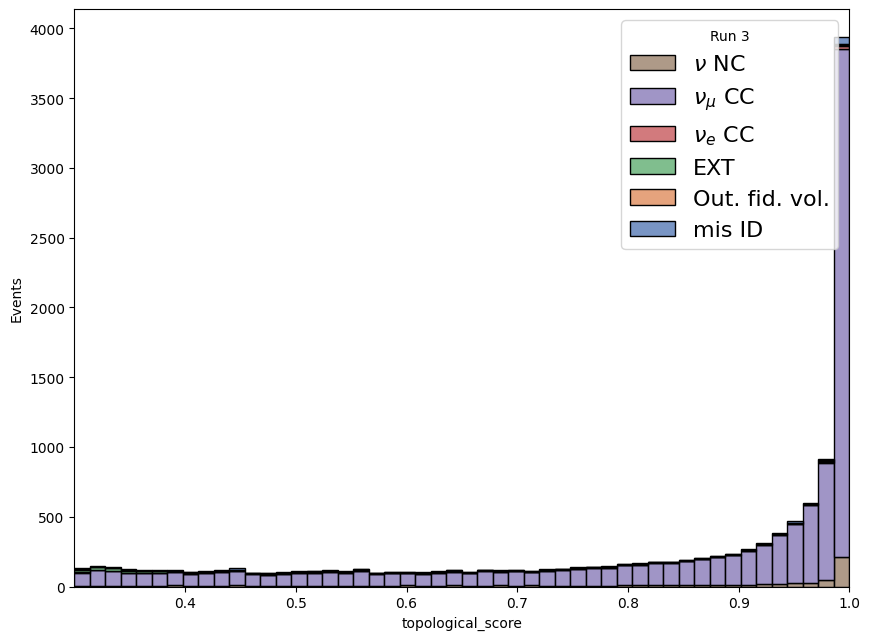

In [21]:
# Simple histogram plot of one variable.
BIN_CUTS = 50

# variable = 'topological_score'

# plt.figure(figsize=(10,7.5))
# i = sns.histplot(data=MC_EXT_CUT, x=variable, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_CUT['weight'], bins = BIN, legend = False)
# i.set(xlabel=variable, ylabel = "Events")

# #plt.yscale('log')
# plt.xlim([np.min(MC_EXT_CUT[variable]), np.max(MC_EXT_CUT[variable])])
# plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
# plt.show(i)

for variable in all_variables_to_plot:
    plt.figure(figsize=(10,7.5))
    i = sns.histplot(data=MC_EXT_CUT, x=variable, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_CUT['weight'], bins = BIN_CUTS, legend = False)
    i.set(xlabel=variable, ylabel = "Events")

    #plt.yscale('log')
    plt.xlim([np.min(MC_EXT_CUT[variable]), np.max(MC_EXT_CUT[variable])])
    plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
    plt.show(i)

# Exercise 8: Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

In [22]:
total_events_master = len(MC_EXT)
# print(total_events_master)

total_events = len(MC_EXT[MC_EXT.trk_energy_tot <= 2])
# print(total_events)
surviving_events = len(MC_EXT_CUT)
# print(surviving_events)
surviving_signal_events = len(MC_EXT_CUT[MC_EXT_CUT.category == 21])
efficiency = surviving_events/total_events
purity = surviving_signal_events/surviving_events
print(f"Efficiency = {efficiency} and Purity = {purity}")

Efficiency = 0.48910277302008864 and Purity = 0.885005812799501


# Exercise 9: Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts.

In [23]:
def create_histogram(simulated_data, true_data, bin_number, variable = 'trk_energy_tot'):

    plt.figure(figsize=(10,7.5))

    # Create the histogram using seaborn
    i = sns.histplot(data=simulated_data, x=variable, multiple="stack", hue="category", palette = 'deep', weights = simulated_data['weight'], bins = bin_number, legend = False)

    # Calculate the histogram data
    counts_sim, bins_sim = np.histogram(simulated_data[variable], bins=bin_number, weights=simulated_data['weight'])
    # print(counts_sim, type(counts_sim))
    # print(bins_sim, type(bins_sim))

    # Calculate the error (15% of the counts) + the statistical poission error
    errors = np.sqrt((0.15 * counts_sim)**2 + np.sqrt(counts_sim)**2)

    # Calculate the bin centers
    bin_centers = (bins_sim[:-1] + bins_sim[1:]) / 2

    # Calculate the bin widths
    bin_widths = np.diff(bins_sim)

    # Add semi-transparent bars to represent the error
    # Add a diagonal hatch pattern
    plt.bar(bin_centers, 2*errors, width=bin_widths, bottom=counts_sim-errors, alpha=0.3, color='gray', align='center', hatch='/', label='Uncertainty')

    # Calculate the histogram data for the second plot
    counts_exp, bins_exp = np.histogram(true_data[variable], bins=bin_number)

    # Plot horizontal lines at each bin count height for the second plot
    plt.hlines(y=counts_exp, xmin=bins_exp[:-1], xmax=bins_exp[1:], color='red', label='MicroBooNE Data')

    i.set(xlabel=variable, ylabel = "Events")

    #plt.yscale('log')
    plt.xlim([np.min(simulated_data[variable]), np.max(simulated_data[variable])])
    # Add 'MicroBooNE Data' to the list of labels in the legend
    plt.legend(title='Legend',fontsize=16, loc='upper right', labels=['MicroBooNE Data',  r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID", 'Uncertainty'])

    plt.show()

    return counts_exp, counts_sim, errors




def histogram_heights_energy(input_energies, input_corresponding_weights, bin_number=25):
    # Calculate the histogram data
    bin_heights, _ = np.histogram(input_energies, bins=bin_number, weights=input_corresponding_weights)

    # Calculate the error (15% of the counts) + the statistical poission error
    errors = np.sqrt((0.15 * bin_heights)**2 + np.sqrt(bin_heights)**2)

    return bin_heights, errors



# Exercise 10: Oscillation and fitting

### a) Define functions requires for Oscillation analysis, test that they work!


In [24]:
# oscillation function

def neutrino_oscillation_remaining(neutrino_energy, mixing_factor, dist_travelled, mass_delta_squared):
    """ neutrino masses: eV
    length: km
    neutrino_energy: GeV"""
    oscillation_factor = np.sin(1.27 * mass_delta_squared * dist_travelled / neutrino_energy)**2
    probability = 1 - mixing_factor * oscillation_factor
    return probability


In [25]:


# neutrino_energies = MC_EXT_CUT['true_E']
# original_weights = MC_EXT_CUT['weight']
# remaining_probs = np.array([])
# for energy in neutrino_energies:
#     prob = neutrino_oscillation_remaining(energy, MIXING_ANGLE, DIST_TRAVELLED, NEUTRINO_MASS_DELTA)
#     remaining_probs = np.append(remaining_probs, prob)
# adjusted_weights = remaining_probs * original_weights
# MC_EXT_CUT_oscillated = MC_EXT_CUT.copy()
# MC_EXT_CUT_oscillated['weight'] = adjusted_weights

# counts_exp_Voscillation, counts_sim_Voscillation, errors_Voscillation = create_histogram(MC_EXT_CUT_oscillated, data_frame, 25)

def generate_adjusted_weight(input_data_weights, input_data_energy,  mass_delta, mixing_angle_factor, dist_travelled):

    # Calculate the remaining probabilities using NumPy vectorization ! MAKES HUGE DIFFERENCE
    remaining_probs = neutrino_oscillation_remaining(input_data_energy, mixing_angle_factor, dist_travelled, mass_delta)

    # Calculate the adjusted weights
    adjusted_weights = remaining_probs * input_data_weights

    return adjusted_weights

In [26]:
# chi squared function
def chi_squared(bin_heights_given, bin_heights_tested, pred_errors):
    # Create a mask for errors above the given value
    pred_errors_mask = pred_errors > 0.001

    # Apply the mask to the bin heights and errors
    bin_heights_given_masked = bin_heights_given[pred_errors_mask]
    bin_heights_tested_masked = bin_heights_tested[pred_errors_mask]
    pred_errors_masked = pred_errors[pred_errors_mask]

    # Calculate chi-squared for the masked values
    return np.sum((bin_heights_given_masked - bin_heights_tested_masked)**2 / pred_errors_masked**2)




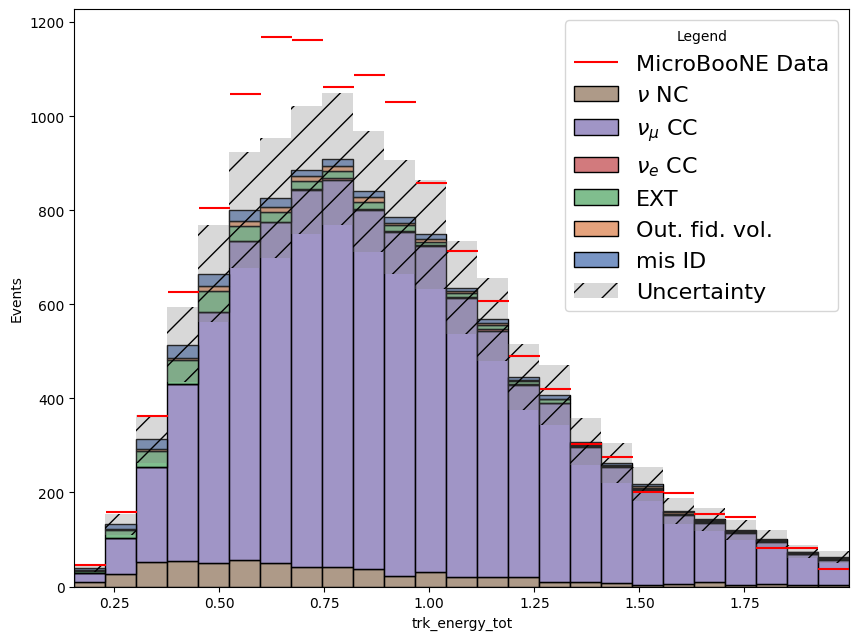

In [27]:
#Using more inefficient method in order to plot the oscillated data:
# MIXING_ANGLE = np.pi/12
# DIST_TRAVELLED = 0.47
# NEUTRINO_MASS_DELTA = 100
# neutrino_energies = MC_EXT_CUT['true_E']
# original_weights = MC_EXT_CUT['weight']
# remaining_probs = np.array([])
# for energy in neutrino_energies:
#     prob = neutrino_oscillation_remaining(energy, MIXING_ANGLE, DIST_TRAVELLED, NEUTRINO_MASS_DELTA)
#     remaining_probs = np.append(remaining_probs, prob)
# adjusted_weights = remaining_probs * original_weights
# MC_EXT_CUT_oscillated = MC_EXT_CUT.copy()
# MC_EXT_CUT_oscillated['weight'] = adjusted_weights

# counts_exp_Voscillation, counts_sim_Voscillation, errors_Voscillation = create_histogram(MC_EXT_CUT_oscillated, data_frame, 25)

# Exercise 11/12: Oscillation parameter scan, contour plotting, closure test.

### Closure test, create your oscillation parameter scanning code, and find minimum values for chi squared!

In [28]:
# Selection cuts on oscillated data
# Oscillated Data
oscillated_file = './data/oscillated_data.pkl'

# Open file as pandas dataframe
MC_OSCILLATED = pd.read_pickle(oscillated_file)

# apply selection cuts
MC_OSCILLATED = Selections(MC_OSCILLATED)


# Display the top 10 rows of the DataFrame
print("Checking the pre-oscillated simulated data:")
# display(MC_OSCILLATED.head(10))
# counts_exp_john, counts_sim_john, errors_john = create_histogram(MC_OSCILLATED, data_frame, 25)




Checking the pre-oscillated simulated data:


In [29]:
# Debug Testing
DIST_TRAVELLED = 0.47 # km
NEUTRINO_MASS_DELTA_DEBUG = 11.111 # eV
MIXING_ANGLE_FACTOR_DEBUG = 0.5545 # sin^2(2*mixing_angle)

# DEBUG CALLING THE FUNCTIONS
tested_energies = MC_EXT_CUT['true_E']
original_tested_weights = MC_EXT_CUT['weight']
given_energies = MC_OSCILLATED['true_E']
given_weights = MC_OSCILLATED['weight']

adjusted_weights = generate_adjusted_weight(original_tested_weights, tested_energies, NEUTRINO_MASS_DELTA_DEBUG, MIXING_ANGLE_FACTOR_DEBUG, DIST_TRAVELLED)
tested_adjusted_bin_heights, tested_bin_errors = histogram_heights_energy(tested_energies, adjusted_weights, 25)
given_bin_heights, _ = histogram_heights_energy(given_energies, given_weights, 25)
first_chi = chi_squared(given_bin_heights, tested_adjusted_bin_heights, tested_bin_errors)
print(f"first chi squared = {first_chi}")





first chi squared = 0.0020228288091381935


In [30]:
# Function that oscillates and calculates chi squared for set delM21 and sin^2(2theta)
DIST_TRAVELLED = 0.47 # km
NUM_MIXING_ANGLES = 50
# mixing_angles = np.linspace(0, np.pi/2, NUM_MIXING_ANGLES)
mixing_angle_factors = np.linspace(0.5, 0.6, NUM_MIXING_ANGLES)

NUM_MASS_DELTAS = 50
mass_deltas_squared = np.linspace(10.5, 12, NUM_MASS_DELTAS)

import time

def calculate_chi_squared(testing_data, validation_data, mass_deltas_squared, mixing_angle_factors, dist=DIST_TRAVELLED, num_mixing=NUM_MIXING_ANGLES, num_mass=NUM_MASS_DELTAS, bin_number_input=25):
    # Initialize an empty list to store the chi-squared values
    chi_squared_values = []

    # select the parts of the testing data that we are going to iterate
    testing_iterated = testing_data.copy()
    tested_energies = testing_iterated['true_E']
    original_tested_weights = testing_iterated['weight']

    # select the parts of the validation data, then generate some bin heights that we will compare to
    given_energies = validation_data['true_E']
    given_weights = validation_data['weight']
    given_bin_heights, _ = histogram_heights_energy(given_energies, given_weights, bin_number_input)

    # Define a function to calculate chi-squared for a given mass_delta and mixing_angle
    def chi_value(mass_delta, mixing_angle):
        adjusted_weights = generate_adjusted_weight(original_tested_weights, tested_energies, mass_delta, mixing_angle, dist)
        tested_bin_heights, tested_bin_errors = histogram_heights_energy(tested_energies, adjusted_weights, bin_number_input)
        chi_squared_value = chi_squared(given_bin_heights, tested_bin_heights, tested_bin_errors)
        return chi_squared_value

    # Start the timer for the overall runtime
    overall = time.time()

    # Loop over each mass_delta and mixing_angle
    for i, mass_delta in enumerate(mass_deltas_squared):
        for j, mixing_angle in enumerate(mixing_angle_factors):
            # Calculate the chi-squared value for the current mass_delta and mixing_angle
            chi_squared_value = chi_value(mass_delta, mixing_angle)

            # Append the chi-squared value to the list
            chi_squared_values.append(chi_squared_value)

    # Print the overall runtime
    print(f"All Chi Values Runtime: {time.time() - overall} seconds")

    # Convert the list of chi-squared values into a 2D array
    chi_squared_matrix = np.array(chi_squared_values).reshape(num_mixing, num_mass)

    # Find the minimum chi-squared value in the matrix
    min_chi_squared_matrix = np.min(chi_squared_matrix)

    # Find the indices of the minimum chi-squared value in the matrix
    min_indices = np.unravel_index(np.argmin(chi_squared_matrix, axis=None), chi_squared_matrix.shape)
    print(min_indices)

    # Get the associated minimum mass_delta and mixing_angle_factor
    min_mass_delta_matrix = mass_deltas_squared[min_indices[0]]
    min_mixing_angle_matrix = mixing_angle_factors[min_indices[1]]

    # Print the minimum chi-squared value and the associated parameters
    print(f"Minimum chi-squared value from matrix: {min_chi_squared_matrix}, with mass_delta: {min_mass_delta_matrix}, mixing_angle_factor: {min_mixing_angle_matrix}")

    return chi_squared_matrix, min_chi_squared_matrix, min_mass_delta_matrix, min_mixing_angle_matrix





In [31]:
# Function that loops the above function across range of values of delM21 and sin^2(2theta)

chi_square_matrix, min_chi_squared, min_mass_delta_matrix, min_mixing_angle_matrix = calculate_chi_squared(MC_EXT_CUT, MC_OSCILLATED, mass_deltas_squared, mixing_angle_factors, bin_number_input=25)
# print(chi_square_matrix)


All Chi Values Runtime: 4.416894912719727 seconds
(20, 27)
Minimum chi-squared value from matrix: 0.0010770944403424377, with mass_delta: 11.112244897959183, mixing_angle_factor: 0.5551020408163265


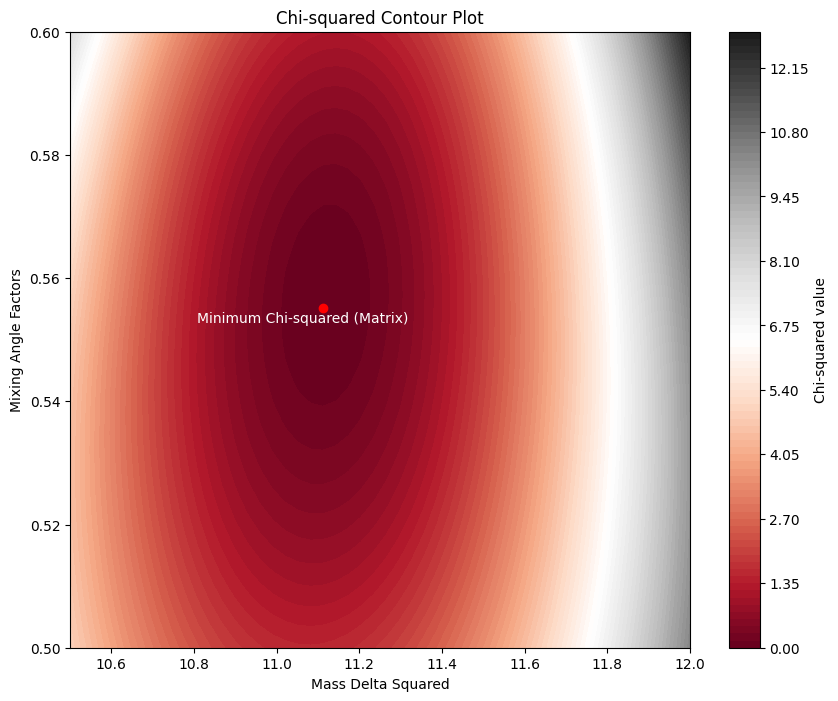

In [32]:
def plot_chi_squared_contour(chi_squared_matrix, mass_deltas_squared, mixing_angle_factors):
    # Create a meshgrid of mass deltas and mixing angles
    x, y = np.meshgrid(mass_deltas_squared, mixing_angle_factors, indexing='ij')
    # print(x)

    # Find the indices of the minimum chi-squared value in the matrix
    min_chi_squared_index = np.unravel_index(np.argmin(chi_squared_matrix, axis=None), chi_squared_matrix.shape)
    min_mass_delta_squared = x[min_chi_squared_index]
    min_mixing_angle_factor = y[min_chi_squared_index]

    # Create the contour plot
    plt.figure(figsize=(10, 8))
    plt.contourf(x, y, chi_squared_matrix, levels=100, cmap='RdGy')
    plt.colorbar(label='Chi-squared value')
    plt.title('Chi-squared Contour Plot')
    plt.xlabel('Mass Delta Squared')
    # plt.xlim(0, 50)
    # plt.ylim(0, 1)
    plt.ylabel('Mixing Angle Factors')

    # Add a red dot for the minimum chi-squared value in the matrix
    plt.plot(min_mass_delta_squared, min_mixing_angle_factor, 'ro')
    plt.annotate('Minimum Chi-squared (Matrix)', (min_mass_delta_squared, min_mixing_angle_factor), textcoords="offset points", xytext=(-15,-10), ha='center', color='white')

    plt.show()



plot_chi_squared_contour(chi_square_matrix, mass_deltas_squared, mixing_angle_factors)



Apply your above defined functions, and represent your result with matplotlib's contour and fcontour.

In [33]:
# oscillate MC wrt to true data

In [34]:
# contourf application

### Bonus: Minimise

Minimise your chi square value, determining the parameters of 'best fit'

### Confidence levels and parameter minima. 
Determine confidence levels, and find the parameter values that correspond to the lowest chi squared value within your range.with

In [35]:
# contour application, with correct confidence levels.

In [36]:
# find lowest chi squared value within range and plot with CL, or contourf plot.

# Exercise 13/14: 3+1 Framework Neutrino disappearance.

In [37]:
# Produce your new oscillation parameter, which should be sin^2(2*theta_ue)

# Compare your result with MiniBooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

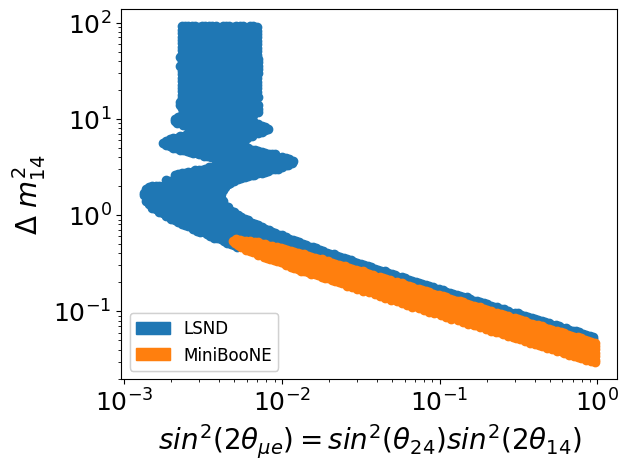

In [38]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'o')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o')

# Producing MiniBooNE/LSND legend
LSND_path = mpatches.Patch(color='tab:blue', label = 'LSND')
MINI_path = mpatches.Patch(color='tab:orange', label = 'MiniBooNE')
first_legend = plt.legend(handles=[LSND_path, MINI_path], loc = 'lower left', fontsize = 12)
plt.gca().add_artist(first_legend)


plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()